In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

plt.style.use('ggplot')

In [15]:
filename = "K:\\ns\\qt\\Diamond\\Setups\\LT5\\data_log_19_03_2018.txt"

<IPython.core.display.Javascript object>


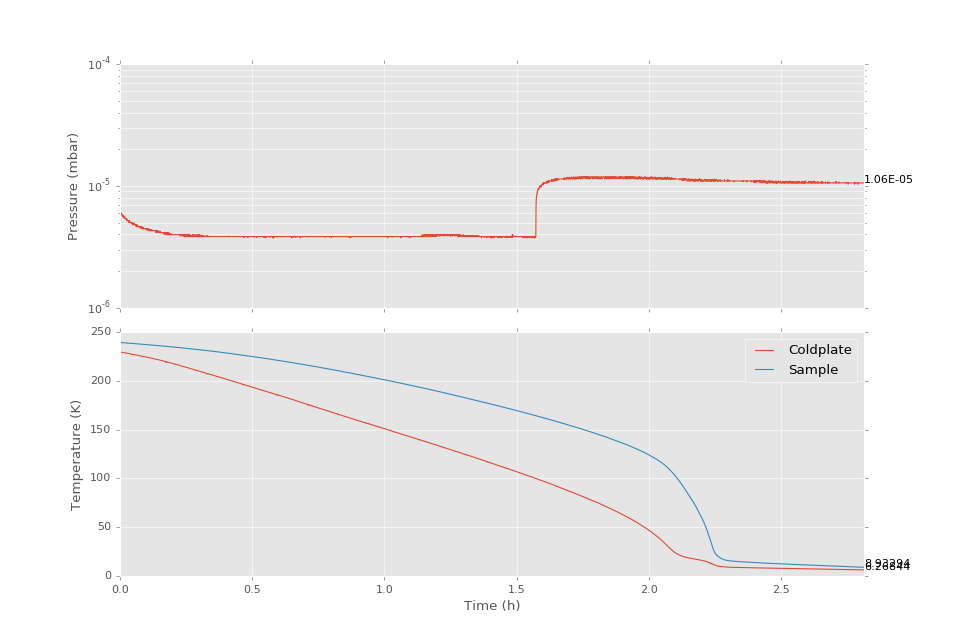

In [ ]:
fig, ax = plt.subplots(2, sharex='col', figsize=(12,8))

#ax[0] = fig.add_subplot(211)
ax[0].grid(True, which='both')

#ax[1] = fig.add_subplot(212)

plt.ion()
fig.canvas.draw()
fig.subplots_adjust(hspace=0.1)

while True:
    del data
    data = pd.read_csv(filename, sep='\t', lineterminator='\n', skiprows=1, decimal=',')
    plt.hold(True)
    starting_time = 0
    highest_time = data['time (s)'][data.index[-1]]/3600
    ax[0].clear()
    ax[0].semilogy(data['time (s)']/3600, data["Cryo In Pressure (mbar)"])
    #ax[0].set_xlabel("Time (h)")
    ax[0].set_ylabel("Pressure (mbar)")
    ax[0].set_xlim(starting_time, highest_time)
    ax[0].label_outer()
    ax[0].text(data['time (s)'][data.index[-1]]/3600,
               data["Cryo In Pressure (mbar)"][data.index[-1]],
               "{:.2E}".format(data["Cryo In Pressure (mbar)"][data.index[-1]]))
    
    ax[1].clear()
    ax[1].plot(data['time (s)']/3600, data['Magnet Temperature (K)'], label="Coldplate")
    ax[1].plot(data['time (s)']/3600, data['Sample Temperature (K)'], label="Sample")
    ax[1].set_xlabel("Time (h)")
    ax[1].set_ylabel("Temperature (K)")
    ax[1].set_xlim(starting_time, highest_time)
    ax[1].ticklabel_format(useOffset=False, style='plain')
    ax[1].legend()
    ax[1].text(data['time (s)'][data.index[-1]]/3600,
               data["Magnet Temperature (K)"][data.index[-1]],
               data["Magnet Temperature (K)"][data.index[-1]])
    ax[1].text(data['time (s)'][data.index[-1]]/3600,
               data['Sample Temperature (K)'][data.index[-1]],
               data['Sample Temperature (K)'][data.index[-1]])
    
    fig.canvas.draw()
    #fig.canvas.draw_idle()  # required to work on mpl < 1.5
    #fig.canvas.flush_events()
    #plt.waitforbuttonpress(timeout=-1)
    time.sleep(2)